In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
salary_frame = pd.read_csv('Resources/salaries.csv')

In [3]:
salary_frame

salary_frame = salary_frame[['player_id', 'salary', 'season_end']]
salary_frame

,player_id,salary,season_end
0,abdelal01,395000,1991
1,abdelal01,494000,1992
2,abdelal01,500000,1993
3,abdelal01,805000,1994
4,abdelal01,650000,1995
...,...,...,...
14158,zipsepa01,750000,2017
14159,zipsepa01,1312611,2018
14160,zizican01,1645200,2018
14161,zubaciv01,1034956,2017


In [4]:
salary_frame['Year_Bins'] = pd.cut(x = salary_frame['season_end'],
                                    bins = [0, 1990, 2000, 2010, 2020],
                                    labels = ["1980s", "1990s", "2000s", "2010s"])

salary_frame


,player_id,salary,season_end,Year_Bins
0,abdelal01,395000,1991,1990s
1,abdelal01,494000,1992,1990s
2,abdelal01,500000,1993,1990s
3,abdelal01,805000,1994,1990s
4,abdelal01,650000,1995,1990s
...,...,...,...,...
14158,zipsepa01,750000,2017,2010s
14159,zipsepa01,1312611,2018,2010s
14160,zizican01,1645200,2018,2010s
14161,zubaciv01,1034956,2017,2010s


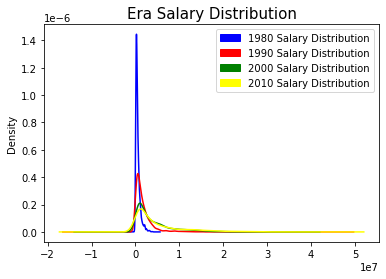

<Figure size 432x288 with 0 Axes>

In [37]:
salary_1980 = salary_frame[salary_frame['Year_Bins'] == '1980s']
salary_1990 = salary_frame[salary_frame['Year_Bins'] == '1990s']
salary_2000 = salary_frame[salary_frame['Year_Bins'] == '2000s']
salary_2010 = salary_frame[salary_frame['Year_Bins'] == '2010s']


salary_1980['salary'].plot.density(color='blue')
salary_1990['salary'].plot.density(color='red')
salary_2000['salary'].plot.density(color='green')
salary_2010['salary'].plot.density(color='yellow')

colors = ['blue', 'red', 'green', 'yellow']

blue_line = mpatches.Patch(color='blue', label='1980 Salary Distribution')
red_line = mpatches.Patch(color='red', label='1990 Salary Distribution')
green_line = mpatches.Patch(color='green', label='2000 Salary Distribution')
yellow_line = mpatches.Patch(color='yellow', label='2010 Salary Distribution')


plt.legend(handles= [blue_line, red_line, green_line, yellow_line])
plt.title('Era Salary Distribution', fontsize=15)
plt.show()
plt.savefig("output_images/Era Salary Distribution")


In [6]:
salary_80 = round(salary_1980['salary'].mean(), 2)


salary_90 = round(salary_1990['salary'].mean(), 2)


salary_00 = round(salary_2000['salary'].mean(), 2)


salary_10 = round(salary_2010['salary'].mean(), 2)



eras_salary = pd.DataFrame({'Eras': [1980, 1990, 2000,2010],
                                    'Average Salary': [salary_80, salary_90, salary_00, salary_10],
                                     })

eras_salary

,Eras,Average Salary
0,1980,511014.07
1,1990,1671198.85
2,2000,3859651.88
3,2010,4704301.40


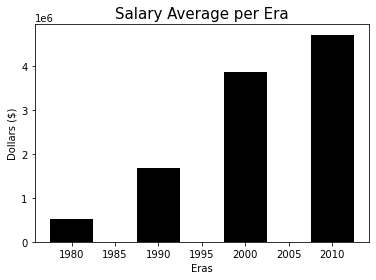

In [36]:
ax = plt.subplot(111)
w = 2
ax.bar(eras_salary['Eras'], eras_salary['Average Salary'], width=5, color='black', align='center')
plt.title('Salary Average per Era', fontsize=15)
plt.xlabel("Eras")
plt.ylabel('Dollars ($)')
plt.savefig("output_images/Salary Averages per Era")